<a href="https://colab.research.google.com/github/JustynaD00/Project-2/blob/Facial-recognition/FaceID_FACENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Face Detection and Recognition**
Face Detection: This involves detecting faces using facial features inorder to identify human faces in photos or videos using machine learning algorithm.

Face recognition: This involves identifying or confirming an individual's identity by matching it against a database of faces.

It is quite easy for humans to carry out face detection and recognition everyday but systems or models have to be trained and tested on huge amounts of data to be accurate.

**This version uses Dlib for face detection and FaceNet512 for face recognition**

**DeepFace**:
It is an open-source library for Python used for face recognition and facial attribute analysis. It has verification, find and analysis function which can be easily used.


In [ ]:
# Install prerquisites
!pip install dlib
!pip install deepface
!pip install pandas
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 852.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=60bb965baf3ae64ace287d00b73b3816c4b476a724dc273b5f0ee1eae66f5ba0
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


**OpenCV**: This is a computer vision library that enhances the building of computer vision applications that can be used to perform face detection and recognition. It is imported as cv2.

**OS module**: This module allows interaction with the operating system.

In [ ]:
#import the libraries
import cv2
import os
import dlib
from deepface import DeepFace
import pandas as pd
import numpy as np

24-01-14 15:03:35 - Directory /root/.deepface created
24-01-14 15:03:35 - Directory /root/.deepface/weights created


In [ ]:
#mount your google drive
#this saves time, however you can use another method which involves uploading the images and saving them to a folder but this takes longer
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# imports the cv2_imshow function from google.colab.patches module for image display
#cv2_imshow is a utility function provided by google colab to help display images. When working in other IDE's , the regular OpenCV function , cv2.imshow should be used.
from google.colab.patches import cv2_imshow


In [ ]:
def drawboundingbox_text(img,faces, text):
  #draw a rectangle around the face detected
  for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 0), 2)
        startY = y
        startX = x
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(img, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)

In [ ]:
#this is a function to detect faces in images
def detectface(img):
  #load the image using OpenCV
 img = cv2.imread(img)
 #convert the image to a gray scale
 gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 #Detects faces using the pretrained HOG(Histogram of Oriented Gradients ) and Linear SVM(support vector machine) face detector included in the dlib library.
 face_detector = dlib.get_frontal_face_detector()
#detects each face in the image
 faces = face_detector(gray_image)
#if there are faces detected, draw a bounding box around the face
 if faces:
  drawboundingbox_text(img,faces, 'Detected')
 #display the image
 cv2_imshow(img)
 #return an array containing the faces
 return faces
#to detect faces on an image


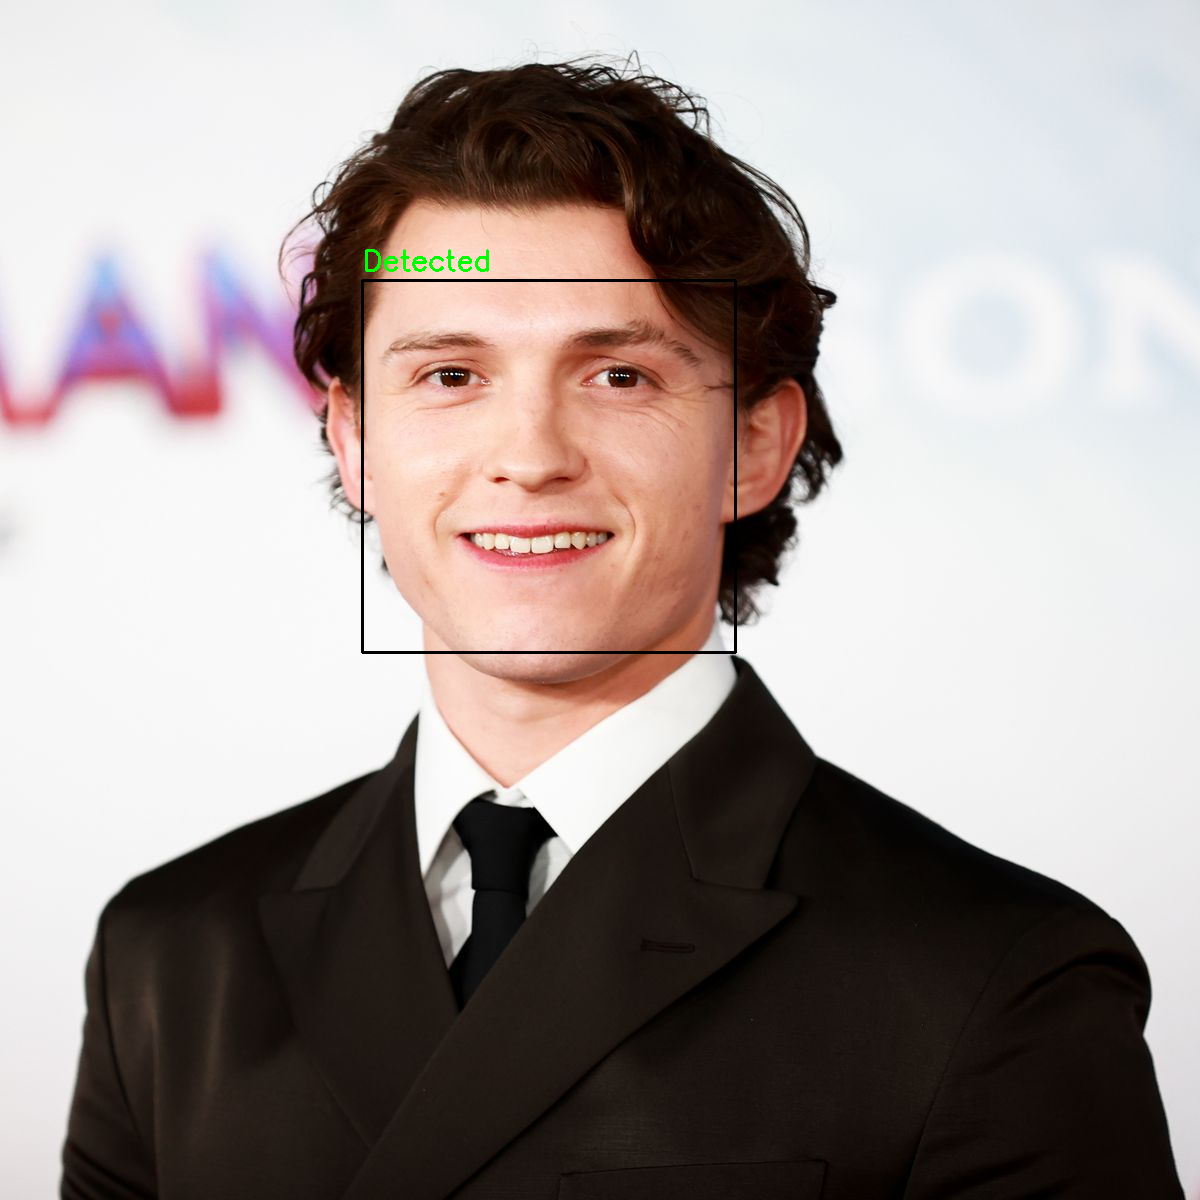

Finding representations:   0%|          | 0/159 [00:00<?, ?it/s]

24-01-14 15:04:09 - facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5

  0%|          | 0.00/95.0M [00:00<?, ?B/s]
  1%|          | 524k/95.0M [00:00<00:21, 4.30MB/s]
  2%|▏         | 2.10M/95.0M [00:00<00:10, 8.73MB/s]
  4%|▍         | 4.19M/95.0M [00:00<00:06, 13.0MB/s]
  8%|▊         | 7.34M/95.0M [00:00<00:05, 16.5MB/s]
 13%|█▎        | 12.1M/95.0M [00:00<00:03, 25.3MB/s]
 19%|█▉        | 18.4M/95.0M [00:00<00:02, 36.2MB/s]
 27%|██▋       | 25.7M/95.0M [00:00<00:01, 46.8MB/s]
 40%|████      | 38.3M/95.0M [00:00<00:00, 70.1MB/s]
 62%|██████▏   | 58.7M/95.0M [00:01<00:00, 109MB/s] 
100%|██████████| 95.0M/95.0M [00:01<00:00, 79.1MB/s]
Finding representations: 100%|██████████| 159/159 [10:53<00:00,  4.11s/it]


24-01-14 15:14:55 - Representations stored in /content/gdrive/MyDrive/Face Data/representations_facenet512.pkl file.Please delete this file when you add new identities in your database.
24-01-14 15:14:56 - find function lasts 654.5278623104095 seconds
['/content/gdrive/MyDrive/Face Data/tom3.jpg']


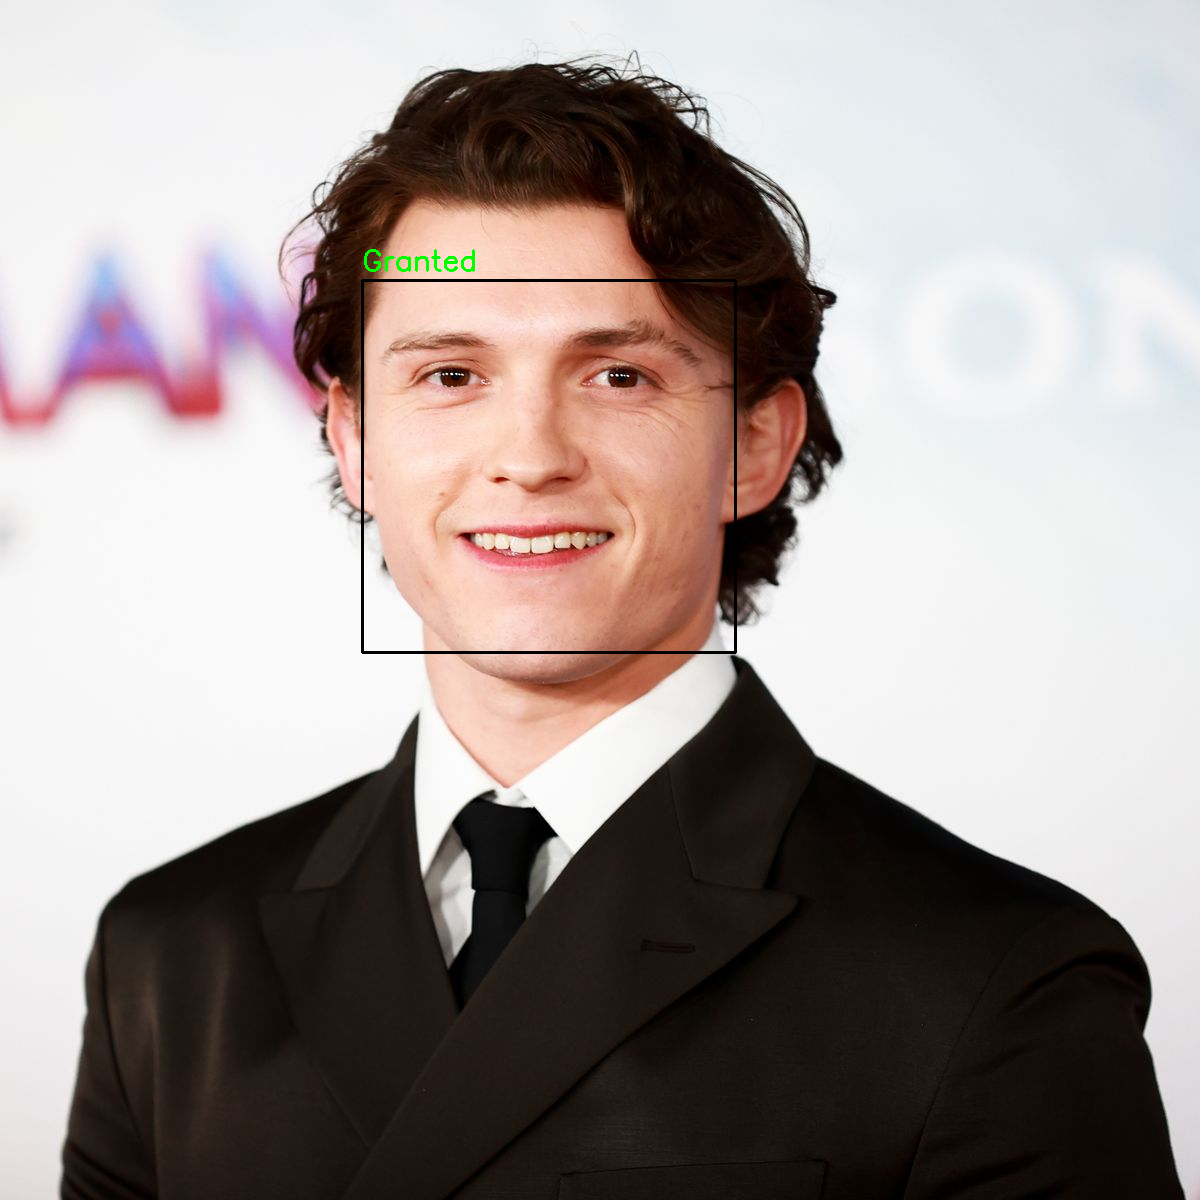

In [ ]:
def face_recognition(img):
  #call on the face detection function
    faces=detectface(img)
    #load the image using OpenCV
    img = cv2.imread(img)
   #similarity between images can be calculated using various metrics, in this project we are using euclidean_l2
    metrics = ["cosine", "euclidean", "euclidean_l2"]
    models = [ "VGG-Face", "Facenet","Facenet512","OpenFace","DeepFace","DeepID","ArcFace","Dlib","SFace"]
    # Execute the facial recognition process using the specified image path, directory, facial recognition model and metric
    result =  DeepFace.find(img_path = img, db_path = "/content/gdrive/MyDrive/Face Data", model_name = models[2],distance_metric = metrics[2], enforce_detection = False)
    #create a dataframe to store the result
    result_df=result[0]
    #this stores the name of the image found similar to the given image
    recog_img = result_df['identity'].values[:1]
    print(recog_img)
    #if there is a match, display the image with the text 'Granted'

    if result_df.shape[0] > 0:
       drawboundingbox_text(img,faces, 'Granted')
       #display the image
       cv2_imshow(img)
       #if there is no match, display the image with the text 'Denied'
    else:
       drawboundingbox_text(img,faces, 'Denied')
       #display the image
       cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#call on the face recognition function
face_recognition("/content/gdrive/MyDrive/Test images/tom5.jpg")